In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-provider-fraud-detection-analysis/Test-1542969243754.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Outpatientdata-1542969243754.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Beneficiarydata-1542969243754.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Inpatientdata-1542969243754.csv
/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv


In [2]:
df_inpatient = pd.read_csv('/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv')
df_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# convert dates
date_cols = [col for col in df_inpatient.columns if 'Dt' in col]
for date_col in date_cols:
    df_inpatient[date_col] = pd.to_datetime(df_inpatient[date_col])
df_inpatient[date_cols].head()

,ClaimStartDt,ClaimEndDt,AdmissionDt,DischargeDt
0,2009-04-12,2009-04-18,2009-04-12,2009-04-18
1,2009-08-31,2009-09-02,2009-08-31,2009-09-02
2,2009-09-17,2009-09-20,2009-09-17,2009-09-20
3,2009-02-14,2009-02-22,2009-02-14,2009-02-22
4,2009-08-13,2009-08-30,2009-08-13,2009-08-30


In [4]:
df_inpatient.describe()

,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AdmissionDt,DeductibleAmtPaid,DischargeDt,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474,40474,40474.000000,40474,39575.0,40474,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,2009-06-19 17:46:36.284034048,2009-06-25 09:37:21.972624384,10087.884074,2009-06-19 17:38:12.493946880,1068.0,2009-06-25 09:36:02.988585216,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
min,2008-11-27 00:00:00,2009-01-01 00:00:00,0.000000,2008-11-27 00:00:00,1068.0,2009-01-01 00:00:00,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,2009-03-20 00:00:00,2009-03-26 00:00:00,4000.000000,2009-03-20 00:00:00,1068.0,2009-03-26 00:00:00,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,2009-06-16 00:00:00,2009-06-22 00:00:00,7000.000000,2009-06-16 00:00:00,1068.0,2009-06-22 00:00:00,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,2009-09-17 00:00:00,2009-09-23 00:00:00,12000.000000,2009-09-17 00:00:00,1068.0,2009-09-23 00:00:00,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,2009-12-31 00:00:00,2009-12-31 00:00:00,125000.000000,2009-12-31 00:00:00,1068.0,2009-12-31 00:00:00,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN
std,NaN,NaN,10303.099402,NaN,0.0,NaN,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN


In [5]:
numerical_cols = df_inpatient.select_dtypes(include=['number']).columns.tolist()
numerical_cols

['InscClaimAmtReimbursed',
 'DeductibleAmtPaid',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6']

In [6]:
categorical_cols = df_inpatient.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['BeneID',
 'ClaimID',
 'Provider',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmAdmitDiagnosisCode',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10']

<Axes: >

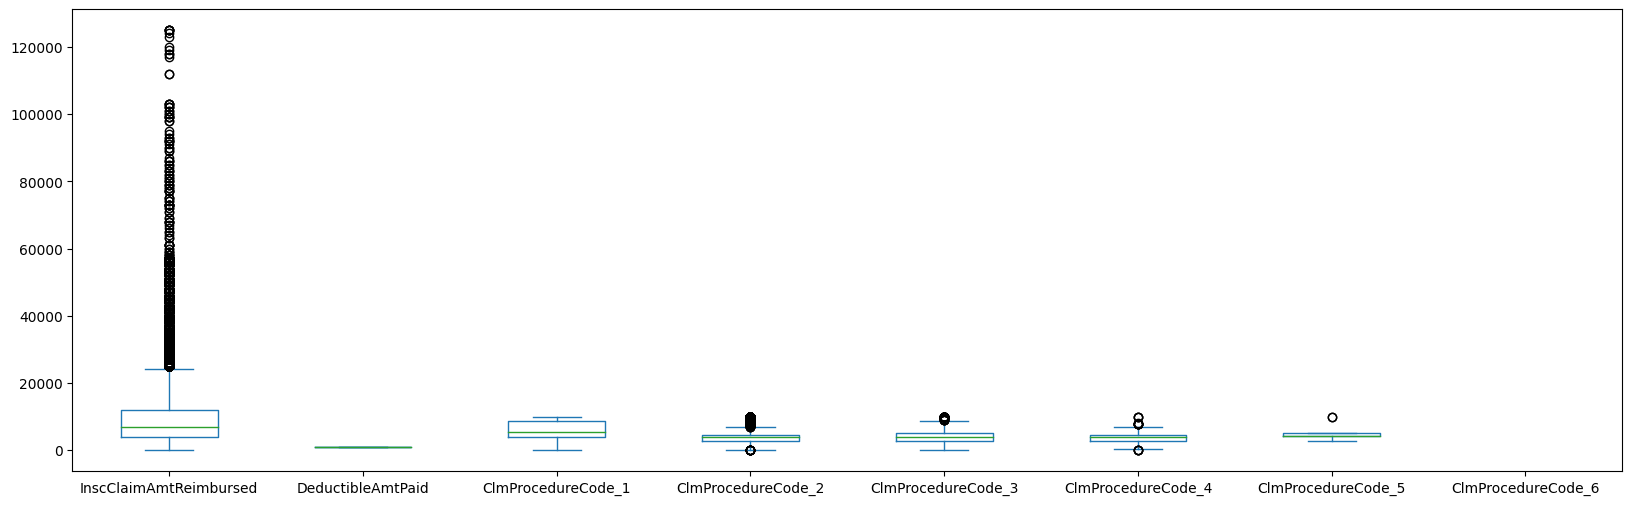

In [7]:
df_inpatient[numerical_cols].plot(kind='box', figsize=(20, 6))

# Numerical data distribution notes
## InscClaimAmtReimbursed
Amount of claim reinbursed by insurance
- Has a ton of outliers, starting from ~\$250,000

## DeductibleAmtPaid
How much the patient paid for their deductible
- Incredibly narrow range, may all be the same based off of df.describe()

## ClmProcedureCode columns
If these correspond to work done for the insurance claim, treat as categorical instead of numerical
- <mark>Do additional studies on these to find out if they are categorical</mark>

In [8]:
len(categorical_cols)

18

In [9]:
df_inpatient[categorical_cols[0:10]].describe()

,BeneID,ClaimID,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2
count,40474,40474,40474,40362,23830,4690,40474,40474,40474,40248
unique,31289,40474,2092,11604,8287,2877,1928,736,2254,2439
top,BENE134170,CLM46614,PRV52019,PHY422134,PHY429430,PHY416093,78650,882,486,4019
freq,8,1,516,386,225,81,1731,179,1499,2484


In [10]:
df_inpatient[categorical_cols[10:20]].describe()

,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
count,39798,38940,37580,35636,33216,30532,26977,3927
unique,2427,2441,2374,2358,2310,2243,2094,952
top,4019,4019,4019,4019,4019,4019,4019,4019
freq,2282,2100,1889,1620,1402,1200,965,128
